In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

line_list=pd.read_csv("COVID19_line_list_data.csv",)
open_line=pd.read_csv('COVID19_open_line_list.csv')
data=pd.read_csv("covid_19_data.csv")
confirm=pd.read_csv('time_series_covid_19_confirmed.csv')
death=pd.read_csv('time_series_covid_19_deaths.csv')
recover=pd.read_csv('time_series_covid_19_recovered.csv')

In [8]:
total=pd.DataFrame({'confirmed':[1],'recovered':[1],'death':[1]})
total['death']=death.iloc[:,4:].sum().max()
total['confirmed']=confirm.iloc[:,4:].sum().max()
total['recovered']=recover.iloc[:,4:].sum().max()
total.index=[confirm.columns.values[-1]]
total.style.background_gradient(cmap='GnBu')

,confirmed,recovered,death
3/11/20,125865.000000,67003.000000,4615.000000


<BarContainer object of 3 artists>

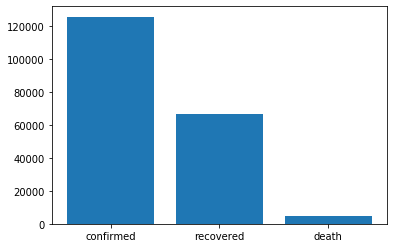

In [9]:
plt.bar(total.columns.values,total.values[0])

In [10]:
cases_day=pd.DataFrame({'confirmed':[],'recovered':[],'death':[]})
cases_day['death']=death.iloc[:,4:].sum()
cases_day['confirmed']=confirm.iloc[:,4:].sum()
cases_day['recovered']=recover.iloc[:,4:].sum()

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 <a list of 9 Text yticklabel objects>)

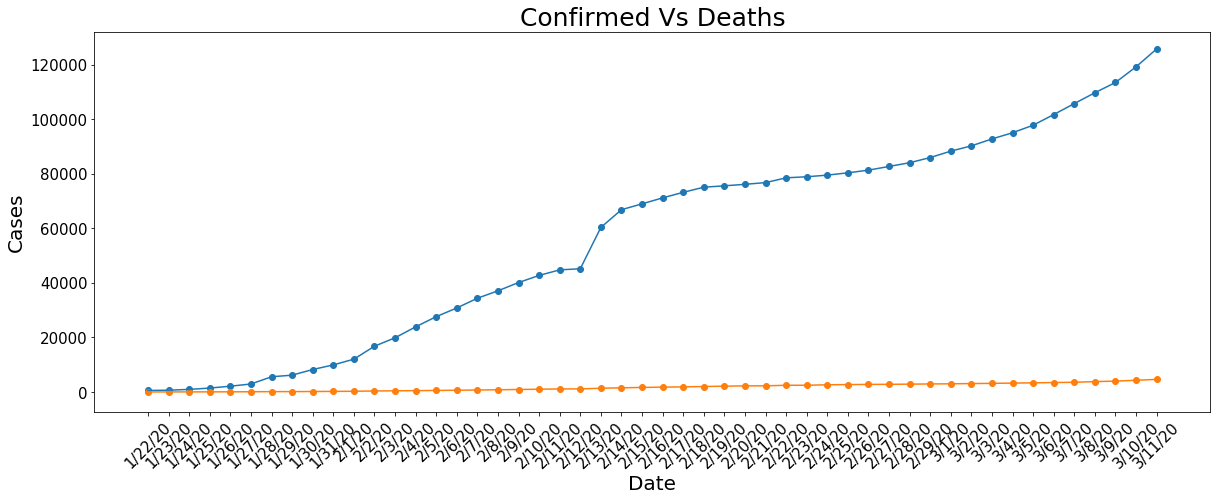

In [11]:
confirm_cases=confirm.iloc[:,4:].sum()
death_cases=death.iloc[:,4:].sum()

plt.figure(figsize=(20,7))
plt.scatter(confirm_cases.index,confirm_cases.values)
plt.plot(confirm_cases.index,confirm_cases.values)

plt.scatter(death_cases.index,death_cases.values)
plt.plot(death_cases.index,death_cases.values)


plt.title('Confirmed Vs Deaths' , size=25)
plt.xlabel('Date', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)

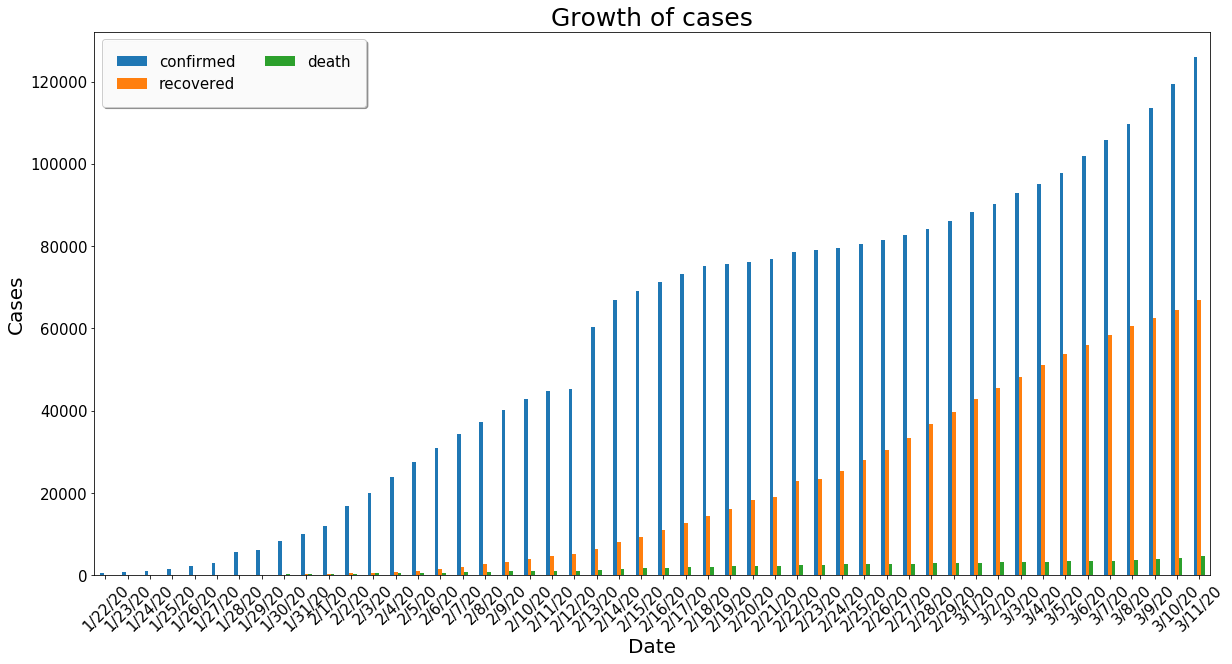

In [12]:
cases_day.plot(kind='bar',figsize=(20,10))

plt.title('Growth of cases' , size=25)
plt.xlabel('Date', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

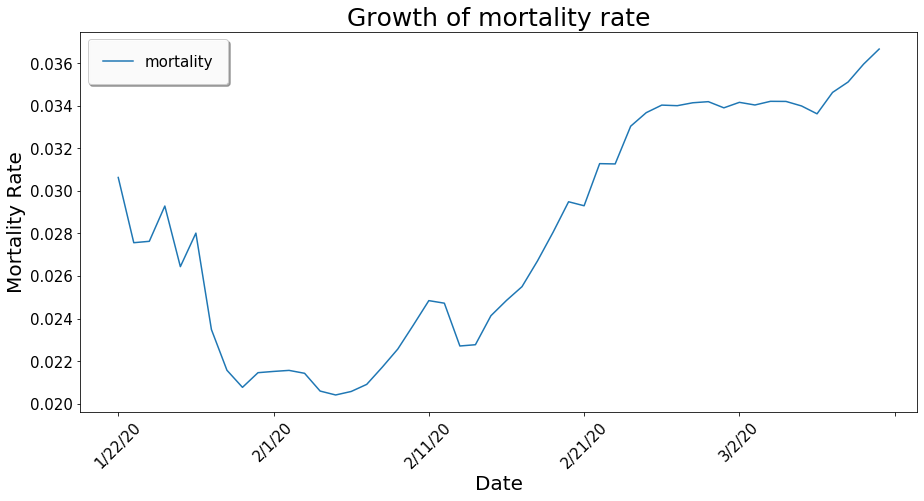

In [13]:
cases_day['mortality']=cases_day['death']/cases_day['confirmed']
cases_day['mortality'].plot(figsize=(15,7))

plt.title('Growth of mortality rate' , size=25)
plt.xlabel('Date', size=20)
plt.ylabel('Mortality Rate', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

In [17]:
dth=death.groupby("Country/Region").sum().iloc[:,3:].max(axis=1)
con=confirm.groupby("Country/Region").sum().iloc[:,3:].max(axis=1)
rec=recover.groupby("Country/Region").sum().iloc[:,3:].max(axis=1)

region=pd.DataFrame({'confirmed':[],'recovered':[],'death':[]})
region['death']=dth.astype(int)
region['confirmed']=con.astype(int)
region['recovered']=rec.astype(int)
region.sort_values(by='death',ascending=False).style.background_gradient(cmap='GnBu')

,confirmed,recovered,death
Country/Region,,,
China,80921,61644,3161
Mainland China,80757,60106,3136
Italy,12462,1045,827
Iran,9000,2959,354
Iran (Islamic Republic of),8042,2731,291
"Korea, South",7755,288,60
US,1670,15,56
Republic of Korea,7513,247,54
Spain,2277,183,54


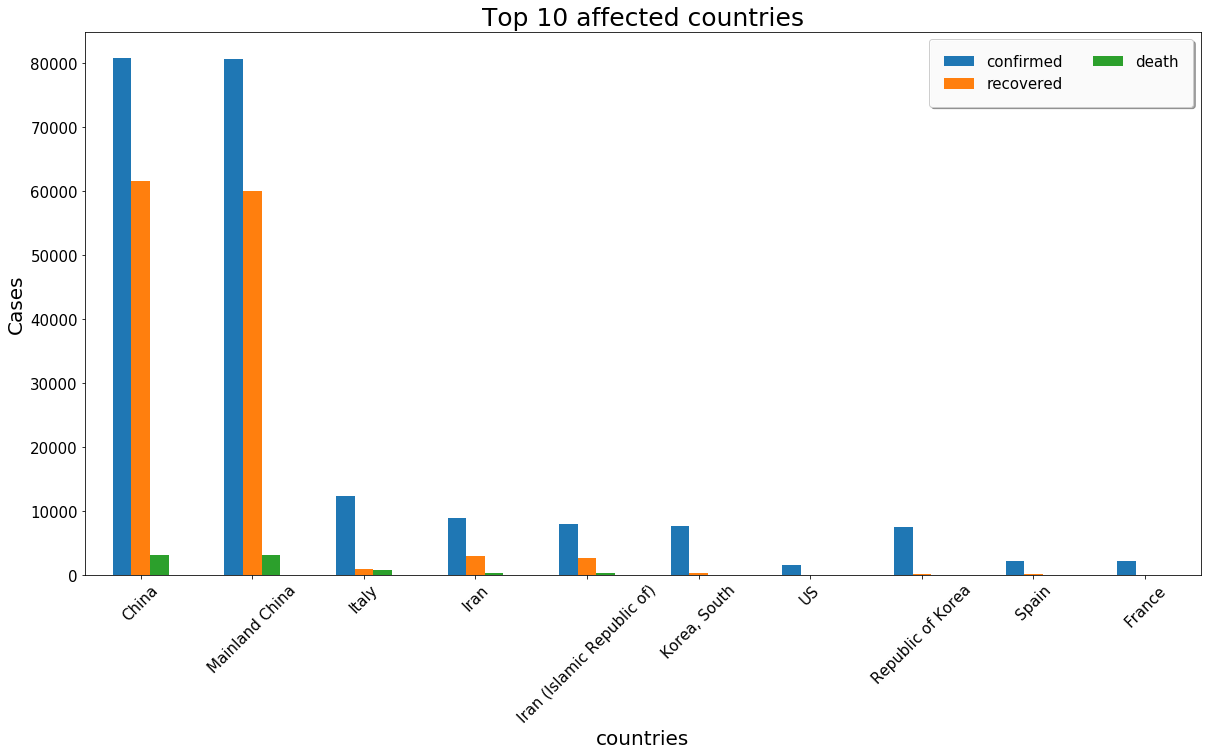

In [18]:
region.sort_values(by= ['death','confirmed'],ascending=False).head(10).plot(kind='bar',figsize=(20,10))
plt.title('Top 10 affected countries' , size=25)
plt.xlabel('countries', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)